# Supervised Models using sklearn

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

#For regression problems :
# Boston house prices.
# Diabetes.
# Linnerud.

# datasets.load_diabets
# datasets.load_linnerud

In [2]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

## Look for Na values, (drop or fill Na's), You check for dtypes and change if required, Normalize/Standardize your data, Describe your data, dummies, Feature engineering, 

# Train Test Split

In [3]:
X= df.iloc[:,:-1]

In [4]:
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Building on Train set

In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train, y_train)

In [7]:
print("R Squared is: ", linear_model.score(X, y))
print(linear_model.coef_)
print(linear_model.intercept_)

R Squared is:  0.7365681603573464
[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]
33.33497575563571


In [8]:
#Decision Tree for Regression
from sklearn.tree import DecisionTreeRegressor
DT_Model = DecisionTreeRegressor().fit(X_train, y_train)

In [9]:
#Random forests for Regression
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100).fit(X_train, y_train)

In [10]:
#SVM for Regression
from sklearn.svm import SVR
SVM_Model = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

# Testing your Model i.e. Predicting using Test set

In [11]:
y_pred = linear_model.predict(X_test)

In [12]:
A_Vs_P = pd.DataFrame([y_pred,y_test]).T


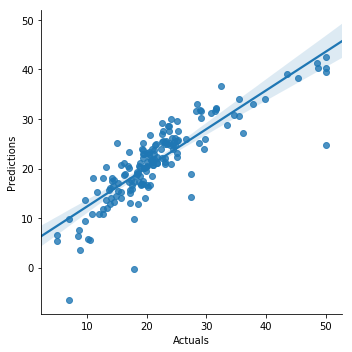

In [19]:
A_Vs_P.rename(columns = {0:'Predictions',1:'Actuals'}, inplace = True)
import seaborn as sns
sns.lmplot(data=A_Vs_P, y='Predictions', x = 'Actuals')

## Finally you calculate the errors of your Model predictions. If Satisfied then ok, else you tune the hyperparameters of your model, do some more feature engineering, add remove column etc and try to optimize your model. Re test and check your results again.

# Unsupervised Models using sklearn

In [14]:
from sklearn import datasets
iris = datasets.load_iris()


In [15]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [16]:
X= df.iloc[:,:-1]
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
y_train.value_counts()

1    35
2    34
0    31
Name: target, dtype: int64

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X_train)
kmeans.cluster_centers_

array([[4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [6.22962963, 2.87037037, 4.99259259, 1.73703704],
       [7.07058824, 3.12941176, 5.96470588, 2.12941176],
       [5.568     , 2.628     , 4.        , 1.244     ]])